## Example data

In [1]:
from pathlib import Path

import librosa # for mel-spectrogram estimation
import soundfile # for opening .flac audio
import numpy as np
from matplotlib import pyplot as plt

In [2]:
clean_audio, framerate = soundfile.read('../data/explore_data/audio_samples/20-205-0000.flac')
noisy_audio, framerate = soundfile.read('../data/explore_data/audio_samples/20-205-0000_noisy.wav')

In [3]:
print(len(clean_audio) / float(framerate)) # length in seconds
print(len(noisy_audio) / float(framerate))

11.85
11.85


In [4]:
# normalized log-mel-spectrogram of clean and noisy audios
clean_mel = 1 + np.log(1.e-12 + librosa.feature.melspectrogram(y=clean_audio, sr=16000, n_fft=1024, hop_length=256, fmin=20, fmax=8000, n_mels=80)).T / 10.
noisy_mel = 1 + np.log(1.e-12 + librosa.feature.melspectrogram(y=noisy_audio, sr=16000, n_fft=1024, hop_length=256, fmin=20, fmax=8000, n_mels=80)).T / 10.

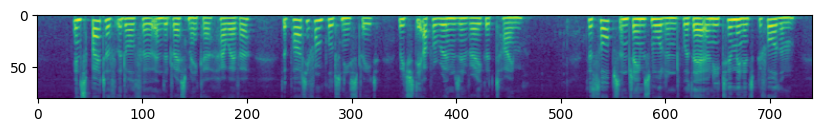

(741, 80)


In [5]:
plt.figure(figsize=(10, 3))
plt.imshow(clean_mel.T)
plt.show()

print(clean_mel.shape)

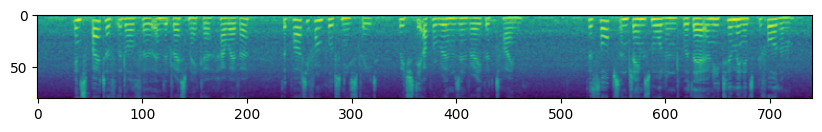

(741, 80)


In [6]:
plt.figure(figsize=(10, 3))
plt.imshow(noisy_mel.T)
plt.show()

print(noisy_mel.shape)

## Train data

In [7]:
example_sound = np.load('../data/train/clean/20/20_205_20-205-0004.npy')
example_sound_noised = np.load('../data/train/noisy/20/20_205_20-205-0004.npy')

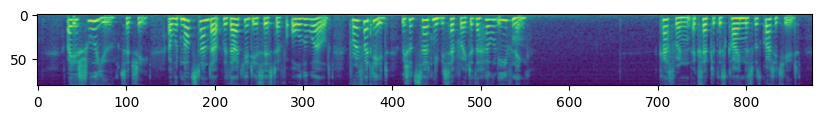

(875, 80)


In [8]:
plt.figure(figsize=(10, 3))
plt.imshow(example_sound.T)
plt.show()

print(example_sound.shape)

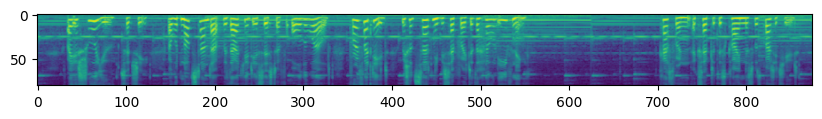

(875, 80)


In [9]:
plt.figure(figsize=(10, 3))
plt.imshow(example_sound_noised.T)
plt.show()

print(example_sound_noised.shape)

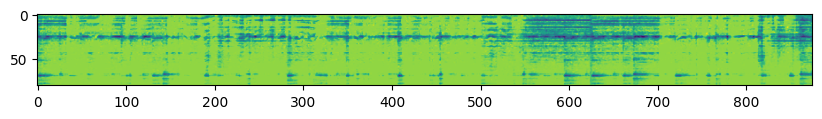

In [10]:
plt.figure(figsize=(10, 3))
plt.imshow((example_sound - example_sound_noised).T)
plt.show()

## Val data

In [11]:
example_sound = np.load('../data/val/clean/82/82_121544_82-121544-0008.npy')
example_sound_noised = np.load('../data/val/noisy/82/82_121544_82-121544-0008.npy')

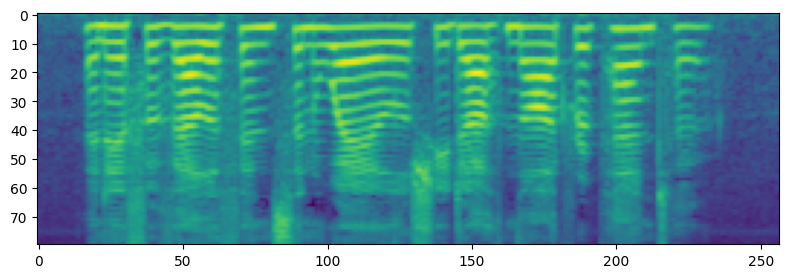

(257, 80)


In [12]:
plt.figure(figsize=(10, 3))
plt.imshow(example_sound.T)
plt.show()

print(example_sound.shape)

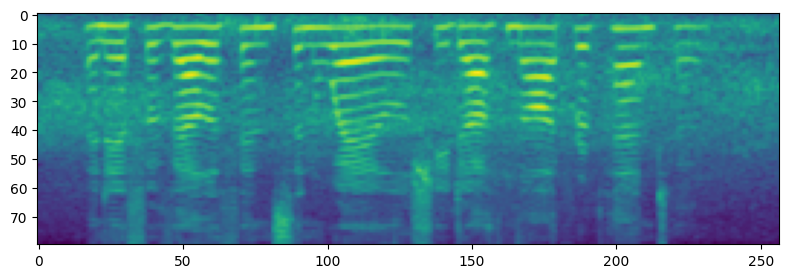

(257, 80)


In [13]:
plt.figure(figsize=(10, 3))
plt.imshow(example_sound_noised.T)
plt.show()

print(example_sound_noised.shape)

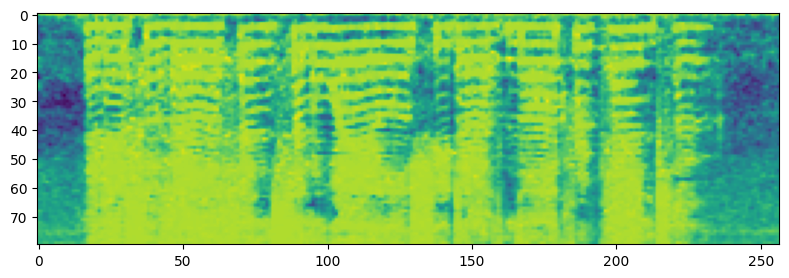

In [14]:
plt.figure(figsize=(10, 3))
plt.imshow((example_sound - example_sound_noised).T)
plt.show()

### Max length of spectrum

In [15]:
data_root = '../data/'
data = list(Path(data_root).rglob(f'*.npy'))


In [16]:
mean_len = 0
max_len = 0
for file_path in data:
    spectrum = np.load(file_path)
    mean_len += spectrum.shape[0]
    if max_len < spectrum.shape[0]:
        max_len = spectrum.shape[0]
mean_len = mean_len / len(data)

print(f'Max len: {max_len}; mean len: {mean_len}')

Max len: 1374; mean len: 758.4350714285714
